1. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
2. Рассчитать и визуализировать корреляционную матрицу для переменных
3. Визуализировать несколько взаимосвязей между переменными
4. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
5. Рассчитать сколько работников работает в каждом департаменте
6. Показать распределение сотрудников по зарплатам
7. Показать распределение сотрудников по зарплатам совместно с департаментами
8. Сколько сотрудников покинули компанию
9. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [2]:
import random
import numpy as np
import pandas as pd
from scipy import stats
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
#Задание №1. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [89]:
data = pd.read_csv('hr.csv')
data1 = data.describe()
data1.drop(data1.index[[0,4,5,6]], inplace=True)

def mode(df):
    count = {}
    for index, row in df.iterrows():
        for key, value in row.iteritems():
            if key not in count:
                count[key] = {}  
            if value not in count[key]:
                count[key][value] = 1
            else:
                count[key][value] += 1               
 
    modes = {}            
    for key in count:
        max_values = count[key]
        maxp = 0
        mode = None
        
        for value, amount in max_values.items():
            if maxp < amount:
                maxp = amount
                mode = value
            
        modes[key] = mode
        
    return modes

a = pd.Series(data = data.median(), name='median')
data1 = data1.append(a)

b = pd.Series(data = mode(data), name='mode')
data1 = data1.append(b)

data1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,low,sales


In [246]:
#Задние №2 Рассчитать и визуализировать корреляционную матрицу для переменных

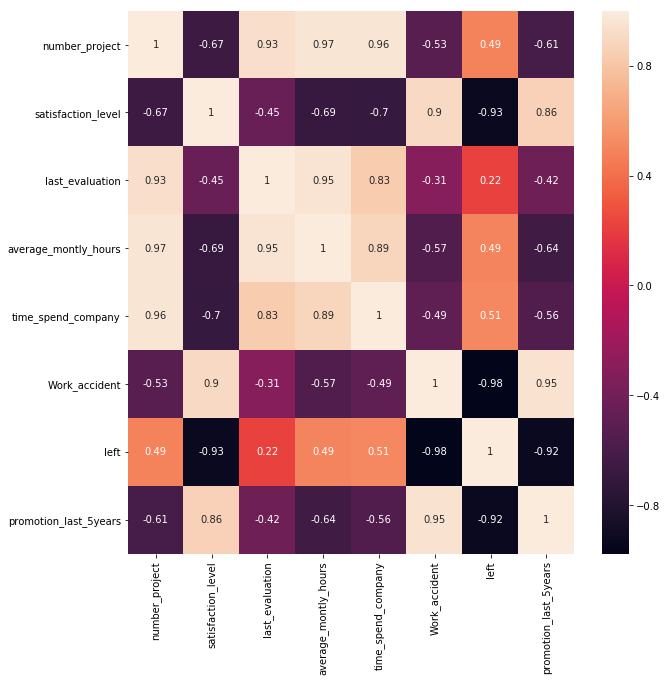

In [247]:
corr = data.corr()

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [241]:
#Задание №3 Визуализировать несколько взаимосвязей между переменными

Text(0,0.5,'оценка')

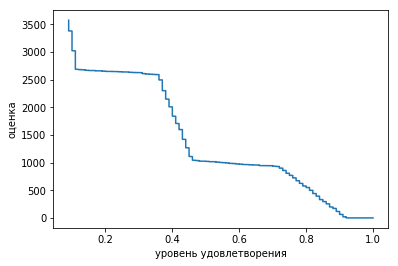

In [244]:
# взаимосвязь уровня удовлетворения работой и увольнением

data=pd.read_csv('hr.csv')
data = data.sort_values(by='satisfaction_level', ascending=False)

satisfaction = [i for i in data['satisfaction_level']]
left = [i for i in data['left']]

left = np.cumsum( left )

#from pylab import rcParams
#rcParams['figure.figsize'] = 10, 10

plt.plot(satisfaction, left)

plt.xlabel('уровень удовлетворения')
plt.ylabel('оценка')

Text(0,0.5,'кол-во лет в компании')

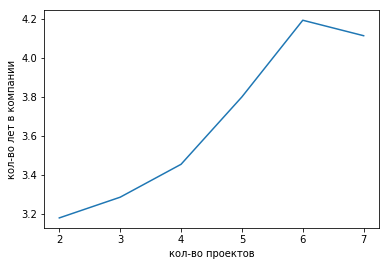

In [245]:
# взаимосвязь длительности работы в компании и количеством рабочих проектов

data=pd.read_csv('hr.csv').groupby(['number_project'], as_index=False).mean()

data = data.sort_values(by='average_montly_hours', ascending=False)

projects = [i for i in data['number_project']]
years = [i for i in data['time_spend_company']]

#left = np.cumsum( left )

#from pylab import rcParams
#rcParams['figure.figsize'] = 10, 10

plt.plot(projects, years)

plt.xlabel('кол-во проектов')
plt.ylabel('кол-во лет в компании')

Text(0,0.5,'кол-во лет в компании')

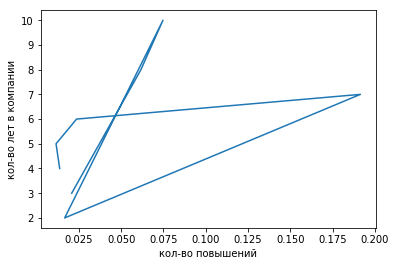

In [254]:
# взаимосвязь длительности работы в компании и количеством рабочих проектов

data=pd.read_csv('hr.csv').groupby(['time_spend_company'], as_index=False).mean()

data = data.sort_values(by='average_montly_hours', ascending=False)

projects = [i for i in data['promotion_last_5years']]
years = [i for i in data['time_spend_company']]

#left = np.cumsum( left )

#from pylab import rcParams
#rcParams['figure.figsize'] = 10, 10

plt.plot(projects, years)

plt.xlabel('кол-во повышений')
plt.ylabel('кол-во лет в компании')


In [55]:
#Задание №4 С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [278]:
cls1 = data[data['salary'] == 'low']['satisfaction_level']
cls2 = data[data['salary'] == 'high']['satisfaction_level']

stats.ttest_ind(cls1, cls2) 

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)

In [48]:
stats.ttest_ind(data['Work_accident'], data['left'])  

Ttest_indResult(statistic=492.4136472501141, pvalue=0.0)

In [49]:
stats.ttest_rel(data['number_project'], data['time_spend_company'])  

Ttest_relResult(statistic=21.761240073900307, pvalue=2.1364262659381762e-103)

In [239]:
#Задание №5 Рассчитать сколько работников работает в каждом департаменте

In [250]:
data = pd.read_csv('hr.csv')
data['sales'].value_counts().head(10)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [238]:
#Задание №6 Показать распределение сотрудников по зарплатам

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

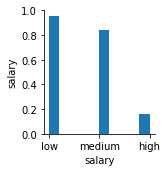

In [91]:
seaborn.pairplot(data, vars=['salary'],) 
data['salary'].value_counts().head()

In [237]:
#Задание №7 Показать распределение сотрудников по зарплатам совместно с департаментами

In [108]:
data.groupby(['salary','sales'])['sales'].count()

salary  sales      
high    IT               83
        RandD            51
        accounting       74
        hr               45
        management      225
        marketing        80
        product_mng      68
        sales           269
        support         141
        technical       201
low     IT              609
        RandD           364
        accounting      358
        hr              335
        management      180
        marketing       402
        product_mng     451
        sales          2099
        support        1146
        technical      1372
medium  IT              535
        RandD           372
        accounting      335
        hr              359
        management      225
        marketing       376
        product_mng     383
        sales          1772
        support         942
        technical      1147
Name: sales, dtype: int64

In [9]:
sales_to_dep = data.sort_values(['sales'])
sales_to_dep.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
3808,0.85,0.92,4,151,3,1,0,0,IT,medium
5253,0.95,0.78,2,148,2,0,0,0,IT,low
5252,0.82,0.60,3,261,2,1,0,0,IT,medium
9000,0.82,0.89,4,275,3,0,0,0,IT,medium
8995,0.74,0.89,3,229,3,0,0,0,IT,medium


In [236]:
#Задание №8 Сколько сотрудников покинули компанию

In [8]:
data['left'].sum()

3571

In [49]:
#Задание №9 Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [52]:
# гипотеза №1: сотрудники увольняются потому, что более 3-х лет и не получили повышения

Результат фильтарций приведенных ниже подтверждает гипотезу №1

In [30]:
left_not_promoted = data [ ( (data['time_spend_company'] > 3) & (data['left']==1) & (data['promotion_last_5years'] == 0) )]
left_not_promoted['left'].sum()

1928

In [31]:
left_promoted = data [ ( (data['time_spend_company'] > 3) & (data['left']==1) & (data['promotion_last_5years'] == 1) )]
left_promoted['left'].sum()

4

In [53]:
# гипотеза №2: сотрудники увольняются потому, что они работают много часов и у них низкая ЗП 

In [ ]:
Результат фильтарций приведенных ниже подтверждает гипотезу №1

In [39]:
hours = [i for i in data['average_montly_hours']]

sum_hours = sum(hours)
num_hours = len(hours)
avg_hours = sum_hours/num_hours

In [37]:
many_hours_low = data [ ( (data['average_montly_hours'] > avg_hours) & (data['salary']== 'low') & (data['left'] == 1) )]
many_hours_low['left'].sum()

1145

In [38]:
many_hours_high = data [ ( (data['average_montly_hours'] > avg_hours) & (data['salary']== 'high') & (data['left'] == 1) )]
many_hours_high['left'].sum()

32